# Yelp 2019 Data Challenge

```
-rw-r--r--@  1 vinceluk  staff   138279749 Nov 15 08:22 business.json
-rw-r--r--@  1 vinceluk  staff  2485747393 Nov 15 08:24 user.json
-rw-r--r--@  1 vinceluk  staff   408807658 Nov 15 08:25 checkin.json
-rw-r--r--@  1 vinceluk  staff   244535478 Nov 15 08:26 tip.json
-rw-r--r--@  1 vinceluk  staff  5347475638 Nov 15 08:35 review.json
-rw-r--r--@  1 vinceluk  staff    25661152 Jan 11 16:06 photo.json
```

In [13]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Business Data

| column | description | type | Can be Null? |
|--------|-------------|------|--------------|
| address | address of business | string | N |
| attributes | dictionary of attributes -ie, GoodForKids': 'False ? I wonder if this is finite list of categories. | dictionary | Y |
| business_id | unique id | string | N |
| categories | comma delimited list of categories - need to get a list | string | Y |
| city | city name | string | N |
| hours | opening hours -ie, monday: 9 to 5 monday is key hour is value | dictionary | Y |
| is_open | not sure if it's based on when data was pulled but 0 or 1 | int64 | N |
| latitude | latitude | float64 | N |
| longitude | longitude | float64 | N |
| name | business name | string | N |
| postal_code | zip | string | N |
| stars | stars review | float64 | N |
| state | 2 letter state code | string | N |

There are 192609 unique entries/businesses

In [36]:
business = pd.read_json('dataset/yelp_dataset2019/business.json', lines=True)
# business = business.replace('None', np.NaN)
# business.set_index('business_id', inplace=True)
print(business.info())
business.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB
None


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [38]:
attributes = business[['business_id','attributes']]
print(attributes.info())
attributes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 2 columns):
business_id    192609 non-null object
attributes     163773 non-null object
dtypes: object(2)
memory usage: 2.9+ MB
None


,business_id,attributes
0,1SWheh84yJXfytovILXOAQ,{'GoodForKids': 'False'}
1,QXAEGFB4oINsVuTFxEYKFQ,"{'RestaurantsReservations': 'True', 'GoodForMe..."
2,gnKjwL_1w79qoiV3IC_xQQ,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera..."
3,xvX2CttrVhyG2z1dFg_0xw,None
4,HhyxOkGAM07SRYtlQ4wMFQ,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint..."


In [39]:
# check None's
print(type(attributes.iloc[3]['attributes']))

<class 'NoneType'>


# User Information

| columns | description |
|---------|-------------|
| average_stars | |
| compliment_cool | ? |
| compliment_cute | ? |
| compliment_funny | ? |
| compliment_hot | ? |
| compliment_list | ? |
| compliment_more | ? |
| compliment_note | ? |
| compliment_photos | ? |
| compliment_plain | ? |
| compliment_profile | ? |
| compliment_writer | ? |
| cool | ? |
| elite | ? |
| fans | ? |
| friends | comma delimited list of user_id's that are friends |
| funny | ? |
| name | user first name |
| review_count | number of reviews written by user |
| useful | how many reviews were voted useful |
| user_id | unique identifier |
| yelping_since | yelp account creation date |

There are 1637138

All columns are non-null

In [40]:
users = pd.read_json('dataset/yelp_dataset2019/user.json', lines=True)
# business = business.replace('None', np.NaN)
# business.set_index('business_id', inplace=True)
print(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637138 entries, 0 to 1637137
Data columns (total 22 columns):
average_stars         1637138 non-null float64
compliment_cool       1637138 non-null int64
compliment_cute       1637138 non-null int64
compliment_funny      1637138 non-null int64
compliment_hot        1637138 non-null int64
compliment_list       1637138 non-null int64
compliment_more       1637138 non-null int64
compliment_note       1637138 non-null int64
compliment_photos     1637138 non-null int64
compliment_plain      1637138 non-null int64
compliment_profile    1637138 non-null int64
compliment_writer     1637138 non-null int64
cool                  1637138 non-null int64
elite                 1637138 non-null object
fans                  1637138 non-null int64
friends               1637138 non-null object
funny                 1637138 non-null int64
name                  1637138 non-null object
review_count          1637138 non-null int64
useful                16371

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


# Tips dataset

Looks like this is some type of user tip/recommendation for the business

| column | description | type |
|--------|-------------|------|
| business_id | unique id for user | string |
| compliement_count | count of compliements - not sure how it's calculated? | int64 |
| date | ? | datetime64(ns) |
| text | compliment text | string |
| user_id | unique id for user | string |


There are 1223094 entries - non of the columns have null values


In [42]:
tips = pd.read_json('dataset/yelp_dataset2019/tip.json', lines=True)
print(tips.info())
tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223094 entries, 0 to 1223093
Data columns (total 5 columns):
business_id         1223094 non-null object
compliment_count    1223094 non-null int64
date                1223094 non-null datetime64[ns]
text                1223094 non-null object
user_id             1223094 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.7+ MB
None


,business_id,compliment_count,date,text,user_id
0,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag
1,OPiPeoJiv92rENwbq76orA,0,2013-05-25 06:00:56,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
2,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q
3,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA
4,AkL6Ous6A1atZejfZXn1Bg,0,2012-10-06 00:19:27,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ


# Reviews Dataset

Here are the columns

| column | description | type |
|--------|-------------|------|
| business_id | ? | string |
| cool | ? | int64 |
| date | date of review | datetime64 |
| funny | count of people voted funny? | int64 |
| review_id | unique identifer | string |
| stars | stars of the review - discrete values (1 to 5) | int64 |
| text | ? | string |
| usefule | vote on usefulness | int64 |
| user_id | user unique identifier | string |

There are 6685900 unique entries

Memory usage for the entire DF = 459.1+ MB

1637138 unique users

192606 businesses - 3 less that businesses listed in business file

Full dataset will take about 30 minutes to load

try review_short.json which only has the first 50k entries

In [3]:
reviews = pd.read_json('dataset/yelp_dataset2019/review_short.json', lines=True)

In [5]:
print(reviews.info())
reviews.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 9 columns):
business_id    object
cool           int64
date           datetime64[ns]
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 459.1+ MB
None


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg


In [33]:
# let's drop columns that we won't need
# keep business_id, review_id, text, and user_id for now
# reviews.drop(['cool', 'date', 'funny', 'useful'])


In [28]:
reviews_by_users = reviews.groupby('user_id').size().sort_values(ascending=False)
print(len(reviews_by_users))
reviews_by_users.head(20)

42988


user_id
CxDOIDnH8gp9KXzpBHJYXw    25
bLbSNkLggFnqwNNzzq-Ijw    17
PKEzKWv_FktMm2mGPjwd0Q    16
62GNFh5FySkA3MbrQmnqvg    16
QJI9OSEn6ujRCtrX06vs1w    15
hWDybu_KvYLSdEFzGrniTw    13
rCWrxuRC8_pfagpchtHp6A    12
-InhDRRVG7wrwsgAUvN4Qw    12
cMEtAiW60I5wE_vLfTxoJQ    11
Wc5L6iuvSNF5WGBlqIO8nw    11
qewG3X2O4X6JKskxyyqFwQ    11
ELcQDlf69kb-ihJfxZyL0A    11
L8P5OWO1Jh4B2HLa1Fnbng    10
ciXjBfJrAEteIKpzZg4I9g    10
fiGqQ7pIGKyZ9G0RqWLMpg    10
sTcYq6goD1Fa2WS9MSkSvQ    10
rKkpHJkJ27xOwnhy_bMkvA     9
3nDUQBjKyVor5wV0reJChg     9
71XStF5U0kmJw2Iym9fclQ     9
QHX3NxFAlda3I32taYzI8w     9
dtype: int64

Text(0, 0.5, 'Number of Users')

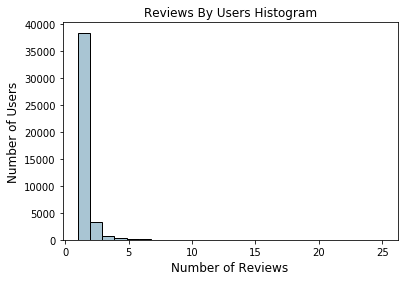

In [21]:
# plot user review histogram to see how often users provide reviews
fig, ax = plt.subplots()
reviews_by_users.hist(bins=25, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Reviews By Users Histogram', fontsize=12)
ax.set_xlabel('Number of Reviews', fontsize=12)
ax.set_ylabel('Number of Users', fontsize=12)

In [30]:
# quantile binning of businesses and number of reviews
quantile_list = [0, .25, .5, .75, 1.]
quantiles = reviews_by_users.quantile(quantile_list)

# fig, ax = plt.subplots()
# reviews.business_id.hist(bins=30, color='#A9C5D3', 
#                              edgecolor='black', grid=False)

# for quantile in quantiles:
#     qvl = plt.axvline(quantile, color='r')

print(type(quantiles))
quantiles.head()


<class 'pandas.core.series.Series'>


0.00     1.0
0.25     1.0
0.50     1.0
0.75     1.0
1.00    25.0
dtype: float64

In [8]:
reviews_by_business = reviews.groupby('business_id').size().sort_values(ascending=False)
print(len(reviews_by_business))
reviews_by_business.head(10)

10659


business_id
ujHiaprwCQ5ewziu0Vi9rw    376
faPVqws-x-5k2CQKDNtHxw    281
Wxxvi3LZbHNIDwJ-ZimtnA    279
HhVmDybpU7L50Kb5A0jXTg    270
XXW_OFaYQkkGOGniujZFHg    264
pH0BLkL4cbxKzu471VZnuA    194
yNPh5SO-7wr8HPpVCDPbXQ    152
uuGL8diLlHfeUeFuod3F-w    150
Xg5qEQiB-7L6kGJ5F4K3bQ    148
N0apJkxIem2E8irTBRKnHw    147
dtype: int64

Text(0, 0.5, 'Number of Business')

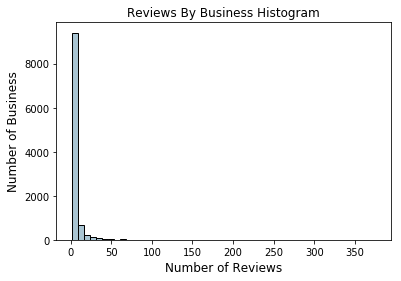

In [16]:
# plot reviews by business histogram to see how many business have how many review
fig, ax = plt.subplots()
reviews_by_business.hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Reviews By Business Histogram', fontsize=12)
ax.set_xlabel('Number of Reviews', fontsize=12)
ax.set_ylabel('Number of Business', fontsize=12)

In [6]:
# quantile binning of businesses and number of reviews
quantile_list = [0, .25, .5, .75, 1.]
quantiles = reviews_by_users.quantile(quantile_list)

# fig, ax = plt.subplots()
# reviews.business_id.hist(bins=30, color='#A9C5D3', 
#                              edgecolor='black', grid=False)

# for quantile in quantiles:
#     qvl = plt.axvline(quantile, color='r')

print(type(quantiles))
quantiles.head()


<class 'pandas.core.series.Series'>


0.00     1.0
0.25     1.0
0.50     1.0
0.75     1.0
1.00    25.0
dtype: float64

Text(0, 0.5, 'Number of Reviews')

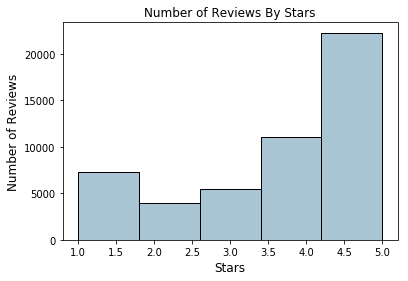

In [32]:
# reviews.hist(column='stars', grid=False)
fig, ax = plt.subplots()
reviews.stars.hist(bins=5, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Number of Reviews By Stars', fontsize=12)
ax.set_xlabel('Stars', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)

In [37]:
# let's look at useful reviews
# looks like most reviews do not have a useful rating
quantile_list = [0, .25, .5, .75, 1.]
reviews.useful.quantile(quantile_list)

0.00      0.0
0.25      0.0
0.50      0.0
0.75      1.0
1.00    101.0
Name: useful, dtype: float64

In [ ]:
reviews.plot(x='stars', kind='hist')

In [ ]:
# print(attributes.head())

# def transform_at(x):
#     print(f'x: {x}')
#     if x is not None:
#         d = x['attributes']
#         print(type(d))
#         print(f'd: {d}')
#         for k, v in d.items():
#             return DataFrame({k: v})
#     else:
#         return None
        
            
# new_att = attributes.apply(transform_at, axis=1, result_type='expand')
# new_att.head()

# # attributes['attributes'].values.todict()